지도학습 : 정답을 컴퓨터에 미리 알려주고 데이터를 학습시키는 방법
- 분류 : 이산형 데이터. 훈련 데이터 레이블 중 하나를 예측
- 회귀 : 연속형 데이터. 연속된 값을 예측

# 1.K-최근접 이웃
: 새 입력을 받았을 때 기존 클러스터에서 모든 데이터와 인스턴스 기반 거리를 측정한 후 가장 많은 속성을 가진 클러스터에 할당하는 분류 알고리즘
- 목표 : 적정한 K 값에 대한 예측
    - 라이브러리 호출
    - 데이터셋 로딩
    - 훈련과 검증 데이터셋 분리
    - 모델 생성
    - K 값 예측

In [1]:
#라이브러리 호출 및 데이터 준비
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length','sepal-width','petal-length', 'petal-width','Class']
dataset = pd.read_csv('iris.data', names = names)

In [21]:
#훈련과 테스트 데이터셋 분리
X = dataset.iloc[:, :-1].values #모든행을 사용하지만 열은 뒤에서 하나를 뺀 값을 가져와서 X에 저장
y = dataset.iloc[:,4].values #모든 행을 사용하지만 열은 앞에서 다섯 번째 값만 가져와서 y에 저장

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
s=StandardScaler() #특성 스케일링. 평균 0, 표준편차 1
s.fit(X_train)
X_train = s.transform(X_train)
X_test = s.transform(X_test) ####왜 test는 s.fit이 불필요하지?

In [22]:
#모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50) #k=50인 k-최근접 이웃 모델 생성
knn.fit(X_train, y_train) #모델 훈련

KNeighborsClassifier(n_neighbors=50)

In [23]:
#모델 정확도
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.9333333333333333


In [28]:
#최적의 K 찾기
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1): #K는 1에서 10까지 값을 취함
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) #for문을 반복하면서 K 값 변경
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc
    
max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc, "으로 최적의 k는 ",k+1,"입니다")


정확도 1.0 으로 최적의 k는  1 입니다


# 2. 서포트 벡터 머신
: 주어진 데이터에 대한 분류. 커널만 적절히 선택하면 정확도가 좋아 정확도를 요구하는 분류 문제에 이용.
  텍스트를 분류할 때도 많이 사용

- 결정 경계는 데이터가 분류된 클래스에서 최대한 멀리 떨어져 있을 때 성능이 가장 좋음
    - 마진 : 결정 경계와 서포트 벡터 사이의 거리 
    - **즉, 최적의 결정 경계는 마진을 최대로 해야함**
    - 이상치(outlier)를 잘 다루는 것이 중요
    - 하드마진 : 이상치를 허용하지 않는 것
    - 소프트 마진 : 이상치 어느정도 포함

- 네 가지 특성으로 붓꽃 분류
    - 라이브러리 호출
    - 데이터셋 로딩
    - 훈련과 검증 데이터셋 분리
    - 모델생성
    - 검증 데이터 예측


In [30]:
#라이브러리 호출
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' #TF_CPP_MIN_LEVEL 이라는 환경 변수를 사용하여 로깅을 제어

- 1: INFO로그 필터링
- 2: WARNING 로그 필터링
- 3: ERROR로그 추가 필터링

In [32]:
#iris 데이터를 준비하고 훈련 데이터셋과 테스트 데이터셋으로 분리
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, 
                                 iris.target, 
                                 test_size=0.6, 
                                 random_state=42)

In [38]:
#SVM 모델에 대한 정확도
from sklearn import svm
svm_model = svm.SVC(kernel='linear',C=1.0, gamma=0.5) #선형분류와 비선형분류를 지원
svm_model.fit(X_train, y_train) #훈련 데이터를 사용하여 SVM 분류기를 훈련
predictions =svm_model.predict(X_test) #훈련된 모델을 사용하여 테스트 데이터에서 예측
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score)) #테스트 데이터 정확도 측정

정확도: 0.988889


- SVM은 선형 분류와 비선형 분류를 지원
- 비선형 문제를 해결하는 가장 기본적인 방법은 저차원 데이터를 고차원으로 보내는 것
    - 커널 트릭 : 가우시안 RBF 커널, 다항식 커널

- 선형 커널 : $K(a,b) = a^T·b$
- 다항식 커널 : $K(a,b) = (\gamma a^T ·b)^d$ </br> > $a,b$: 입력벡터, $d$:차원, $\gamma,d$는 하이퍼파라미터)
- 가우시안 RBF 커널 : $K(a,b) = \exp (-\gamma \| a-b \rVert ^2)$ 
</br> > $\gamma$ 는 하이퍼파라미터)

# 3.결정트리
: 이상치가 많은 값으로 구성된 데이터셋을 다룰 때 사용. 머신러닝이 어떤 방식으로 의사결정을  하는지 알고 싶을 때 유용

- 순도를 증가하고 불순도와 불확실성을 감소하는 방향으로 학습 진행 : 정보획득
    - 불확실성을 계산하는 법
        - 엔트로피 $Entropy(A) = -\sum_{k=1}^m p_k \log_{2}p_k$
          ($P_k=A$ 영역에 속하는 데이터 가운데 k 범주에 속하는 데이터 비율)
        - 지니계수 $G(S) = 1-\sum_{i=1}^c p_i^2$

In [1]:
import pandas as pd
df = pd.read_csv('titanic/train.csv',index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [2]:
#데이터 전처리
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']] #승객의 생존 여부를 예측하기 위해 사용
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = df.dropna()
X = df.drop('Survived',axis=1)
y=df['Survived'] #survived 값을 예측 레이블로 사용

In [3]:
#훈련과 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
#결정트리 모델 생성
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [5]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
#모델 예측
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7988826815642458

In [7]:
#혼동행렬을 이용한 성능 측정
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ['Predicted Not Survival','Predicted Survival'],
    index = ['True Not Survival','True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,95,17
True Survival,19,48


- 혼동행렬
|       |예측값   |positive |Negative |
|-------|---------|---------|---------|
|실제값 |positive |TP       |FN       |
|       |negative |FP       |TN       |

# 4.로지스틱 회귀와 선형 회귀
: 주어진 데이터 분류. 주어진 데이터에 대한 확신이 없거나 추가적으로 훈련 데이터셋을 수집하여 모델을 훈련시킬 수 있는 환경에서 사용
- 분석하고자 하는 대상들이 두 집단 혹은 그 이상의 집단으로 나누어진 경우 개별 관측치들이 어느 집단으로 분류될 수 있는지 분석하고 예측하는 모형
- 독립변수(예측변수) : 영향을 미칠 것으로 예상되는 변수
- 종속 변수(기준 변수) : 영향을 받을 것으로 예상되는 변수

- 일반 회귀 분석과 로지스틱 회귀 분석 차이
|구분           |일반적인 회귀 분석   |로지스틱 회귀 분석  |
|---------------|---------------------|--------------------|
|종속 변수      |연속형 변수          |이산형 변수         |
|모형 탐색 방법 |최소제곱법           |최대 우도법         |
|모형 검정      |F-테스트, t-테스트   |X^2 테스트          |

In [10]:
#라이브러리 호출 및 데이터 준비
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits() #숫자데이터셋은 사이킷런에서 제공
print("Image Data Shape",digits.data.shape) #digit 데이터의 형태
print("Label Data Shape",digits.target.shape) 

Image Data Shape (1797, 64)
Label Data Shape (1797,)


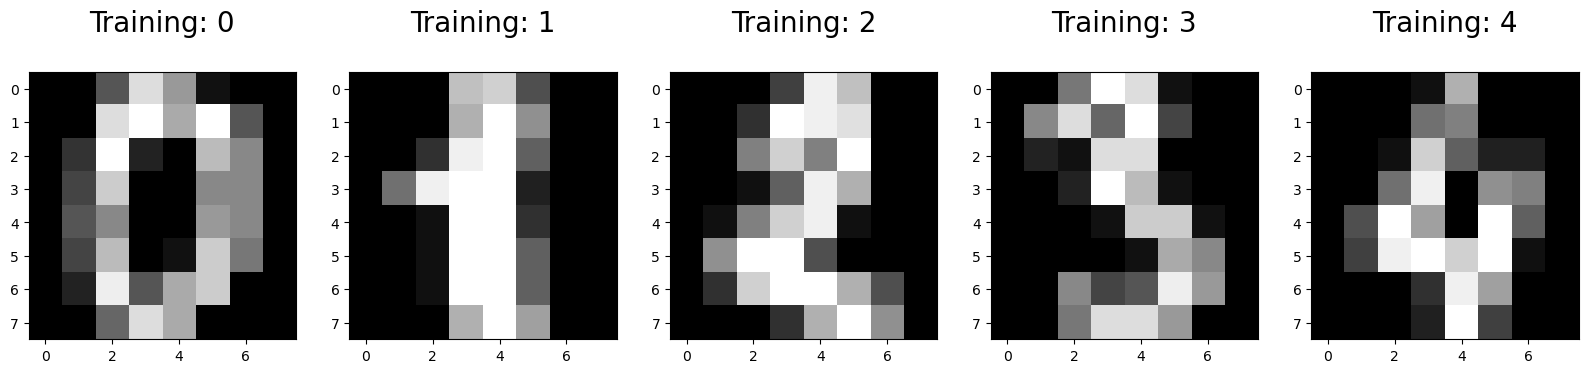

In [12]:
#digits 데이터 시각화
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
#예시로 이미지 다섯개만 확인
for index,(image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n"%label, fontsize=20)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() #로지스틱 회귀 모델의 인스턴스 생성
logisticRegr.fit(x_train, y_train) #모델 훈련

C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#일부 데이터를 사용한 모델 예측
logisticRegr.predict(x_test[0].reshape(1,-1)) #새로운 이미지 예측 결과를 넘파이 배열로 출력
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [15]:
#전체 데이터를 사용한 모델 예측
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test) #스코어 메서드를 사용한 성능 측정
print(score)

0.9511111111111111


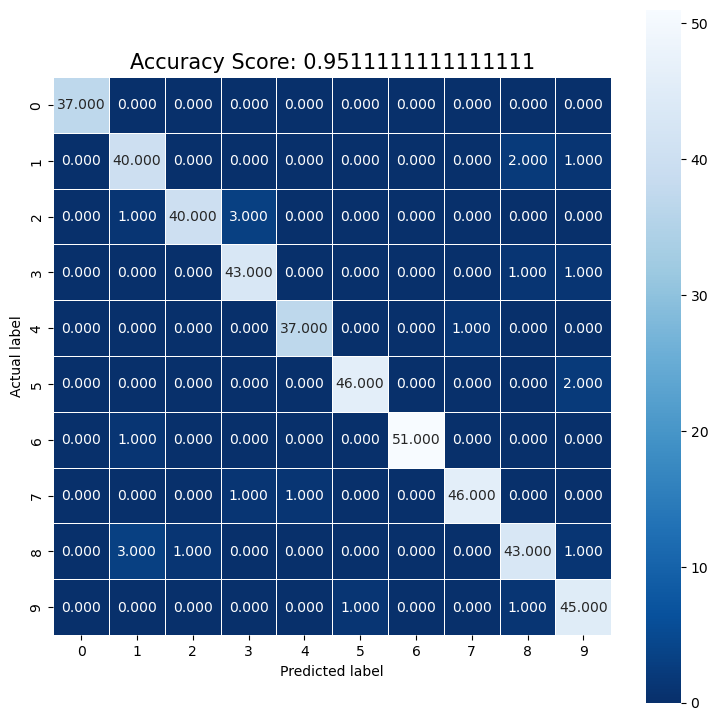

In [17]:
#혼동행렬 시각화
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label');
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15);
plt.show()

**선형회귀**
: 종속변수와 독립 변수 사이의 관계를 설정하는 데 사용
- 확률을 구하는 로지스틱과 달리 변수를 추정하는데 유용

In [18]:
#기온예측
#라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [19]:
dataset = pd.read_csv('weather.csv')

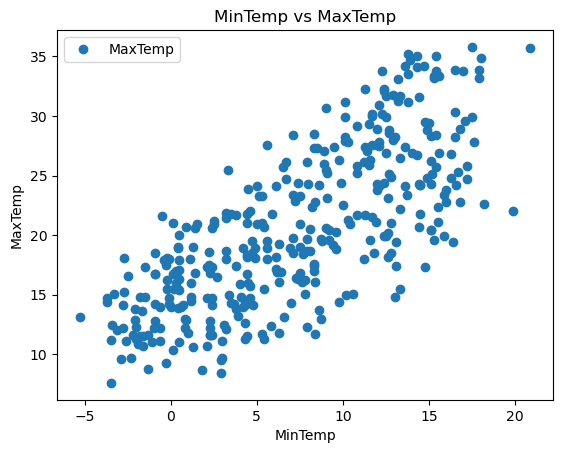

In [20]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [21]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regressor = LinearRegression() #선형 회귀 클래스를 가져옴
regressor.fit(X_train, y_train) #모델 훈련

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test. flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,21.7,23.983285
1,24.1,18.593880
2,22.8,28.003952
3,26.9,27.661767
4,16.9,19.791525
...,...,...
69,19.9,27.918406
70,24.2,28.517229
71,28.4,27.490675
72,16.1,19.705979


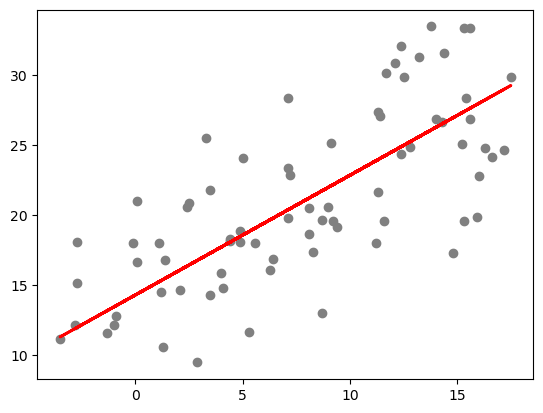

In [25]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [26]:
print("평균 제곱법:",metrics.mean_squared_error(y_test, y_pred))
print("루트 평균 제곱법:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균 제곱법: 18.69552006267992
루트 평균 제곱법: 4.3238316413431175
